In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from KalmanFilter import LeadLagKF, LeadLagllem, LeadLagSmoothing, LeadLagMLfit
from numpy.linalg import cholesky, inv
from scipy.stats import norm

In [2]:
np.random.seed(142);
    
s_eps1 = 0.2;
s_eps2 = 0.21;
s_eps3 = 0.15

s_eta1 = 0.4;
s_eta2 = 0.31;
s_eta3 = 0.05

# rho_eps12 = 0.3;
# rho_eps13 = 0.1;
# rho_eps23 = -0.1;

rho_eta12 = 0.4;
rho_eta13 = 0.1;
rho_eta23 = -0.05;

Ht = np.array([[s_eps1**2, 0, 0],
               [0, s_eps2**2, 0],
               [0, 0, s_eps3**2]]);

Qt = np.array([[s_eta1**2, rho_eta12*s_eta1*s_eta2, rho_eta13*s_eta1*s_eta3], 
               [rho_eta12*s_eta1*s_eta2, s_eta2**2, rho_eta23*s_eta2*s_eta3],
               [rho_eta13*s_eta1*s_eta3, rho_eta23*s_eta2*s_eta3, s_eta3**2]]);

Q_t = np.hstack((Qt, np.zeros(np.shape(Qt))));
Q_t = np.vstack((Q_t, np.zeros((len(Q_t),len(Q_t[0]*2)))));

psi1 = 0.5;
psi2 = 0.4;
psi3 = 0.1;

psi = np.array([psi1, psi2, psi3]);


Z_t = np.array([[1, 0, 0, 0, 0, 0], 
                [0, 1, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0]]);

F = np.eye(3) - np.eye(3)*np.array([[psi1],
                                    [psi2],
                                    [psi3]]);

Tsu = np.hstack((np.eye(3) + F, -F));
Tgiu = np.hstack((np.eye(3), np.zeros((3,3))));

T_t = np.vstack((Tsu, Tgiu));

R_t = np.eye(len(Q_t));

n_steps = 300;

Y = np.empty((n_steps, len(Qt)));
alpha = np.empty((n_steps+1, len(Ht)));
p = np.empty((n_steps+1, len(Ht)));

# Y[0] = np.array([1,2.5,5]);

a0 = np.zeros(len(Qt));

alpha[0] = a0;

for i in np.arange(1, n_steps+1):
    
    p[i] = p[i-1] + np.random.multivariate_normal(np.zeros(len(Qt)), Qt);
    alpha[i] = alpha[i-1] + psi * (p[i]-alpha[i-1]);
    Y[i-1] = alpha[i-1] + np.random.multivariate_normal(np.zeros(len(Ht)), Ht);

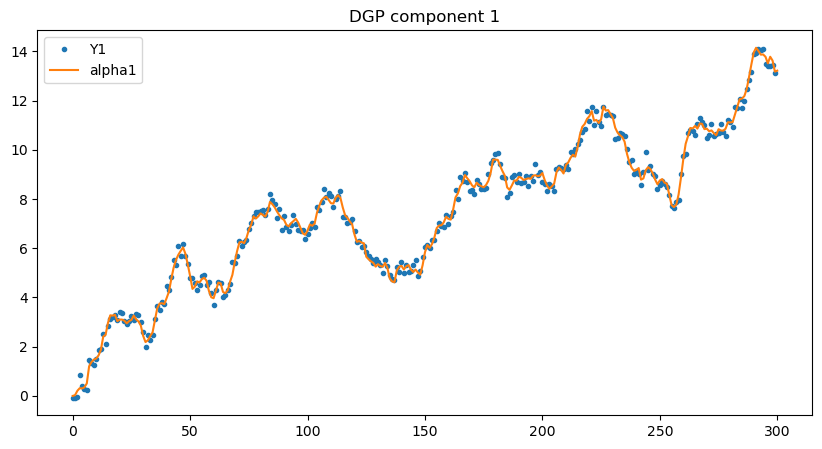

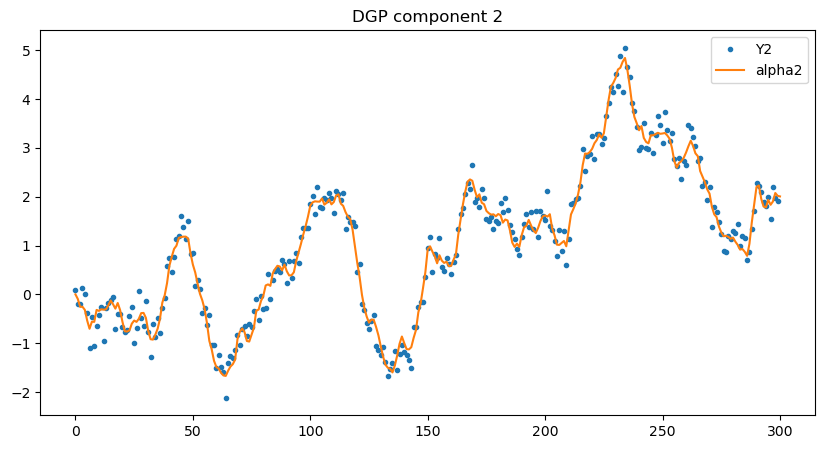

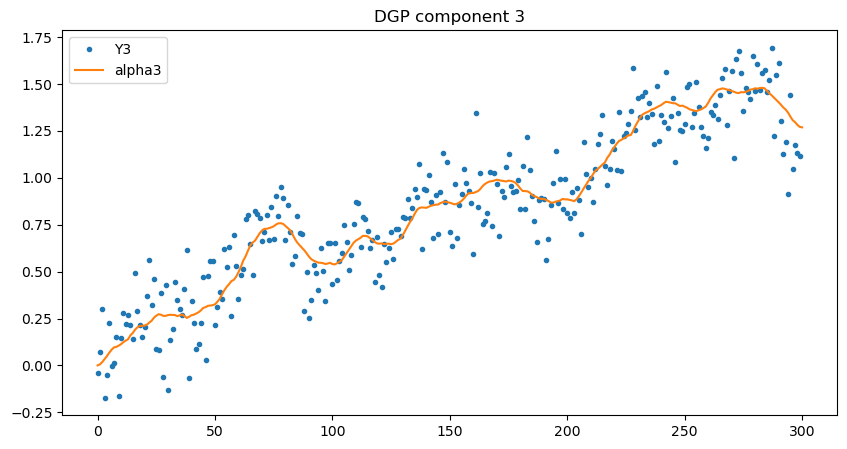

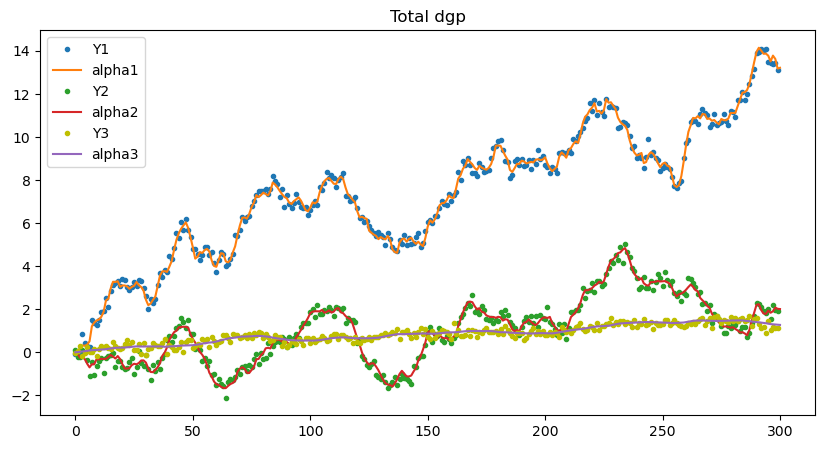

In [3]:
plt.figure(figsize=(10,5))
plt.plot(Y[:,0], '.');
plt.plot(alpha[:,0]);
plt.legend(['Y1','alpha1']);
plt.title('DGP component 1');
plt.show();

plt.figure(figsize=(10,5))
plt.plot(Y[:,1], '.');
plt.plot(alpha[:,1]);
plt.legend(['Y2','alpha2']);
plt.title('DGP component 2');
plt.show();

plt.figure(figsize=(10,5))
plt.plot(Y[:,2], '.');
plt.plot(alpha[:,2]);
plt.legend(['Y3','alpha3']);
plt.title('DGP component 3');
plt.show();

plt.figure(figsize=(10,5))
plt.plot(Y[:,0], '.');
plt.plot(alpha[:,0]);
plt.plot(Y[:,1], '.');
plt.plot(alpha[:,1]);
plt.plot(Y[:,2], '.', color='y');
plt.plot(alpha[:,2]);
plt.legend(['Y1','alpha1', 'Y2','alpha2', 'Y3','alpha3'] );
plt.title('Total dgp');
plt.show();

In [4]:
att, Ptt, at, Pt, vt, Ft, Kt, loglike = LeadLagKF(Y, Z_t, T_t, Ht, Q_t);

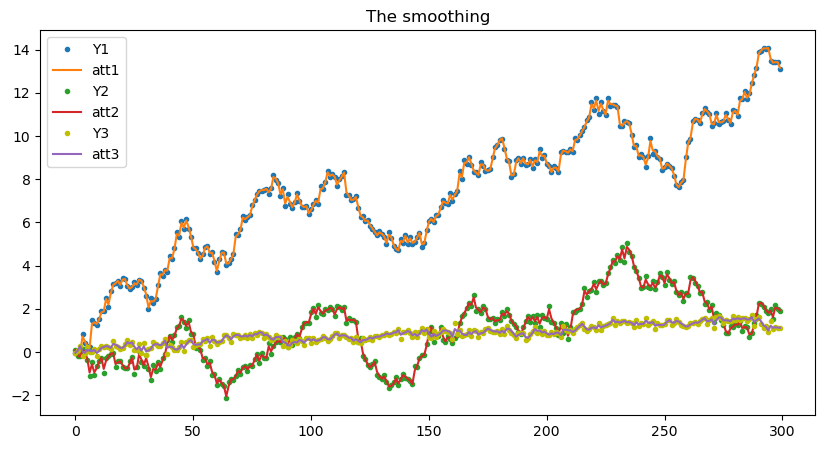

In [5]:
plt.figure(figsize=(10,5))
plt.plot(Y[:,0], '.');
plt.plot(att[:,0]);
plt.plot(Y[:,1], '.');
plt.plot(att[:,1]);
plt.plot(Y[:,2], '.', color='y');
plt.plot(att[:,2]);
plt.legend(['Y1','att1', 'Y2','att2', 'Y3','att3']);
plt.title('The smoothing');
plt.show();

In [6]:
x_smooth, V_smooth, Vt_smooth = LeadLagSmoothing(Y, Z_t, T_t, att, Ptt, Pt, vt, Ft, Kt)

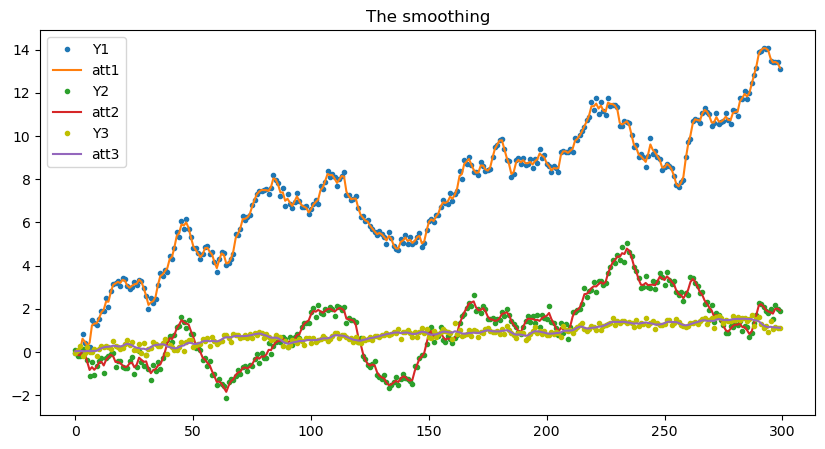

In [7]:
plt.figure(figsize=(10,5))
plt.plot(Y[:,0], '.');
plt.plot(x_smooth[:,0]);
plt.plot(Y[:,1], '.');
plt.plot(x_smooth[:,1]);
plt.plot(Y[:,2], '.', color='y');
plt.plot(x_smooth[:,2]);
plt.legend(['Y1','att1', 'Y2','att2', 'Y3','att3']);
plt.title('The smoothing');
plt.show();

In [9]:
# kalman_filter(Y, Z_t, T_t, Ht, Q_t)
    
Q_init = Q_t;
R_init = Ht;
F_init = T_t;
C = Z_t;

maxiter = 100;
eps = 10**-9

start = time();

F_hat, R_hat, Q_hat, att_hat, Ptt_hat, at_hat, Pt_hat, x_smooth_hat, V_smooth_hat, Vt_smooth_hat, vt_hat, Ft_hat, loglike_hat = LeadLagllem(Y, Q_init, R_init, F_init, C, maxiter, eps);

end = time();

enlapsed_time = end - start;

minutes = int(enlapsed_time/60);
seconds = int(enlapsed_time - minutes*60);

print('Enlapsed time : '+str(minutes)+' minutes and '+str(seconds)+' seconds');

Tolerance level: 0.03831813033565368
N. of iteration: 100
Enlapsed time : 0 minutes and 24 seconds


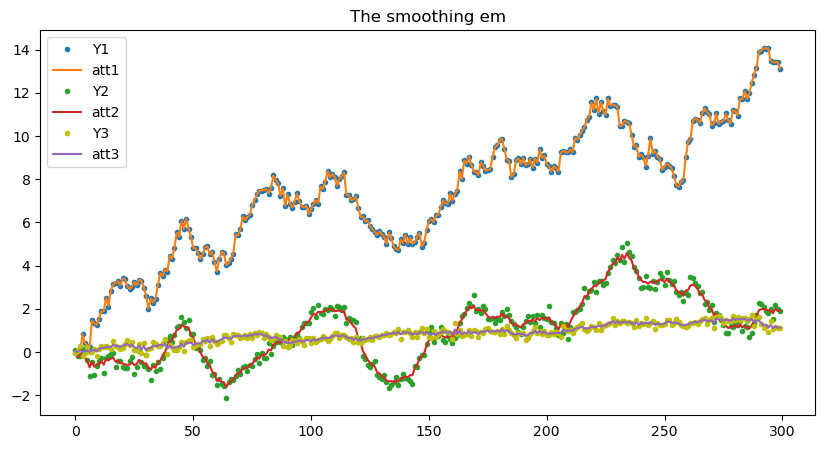

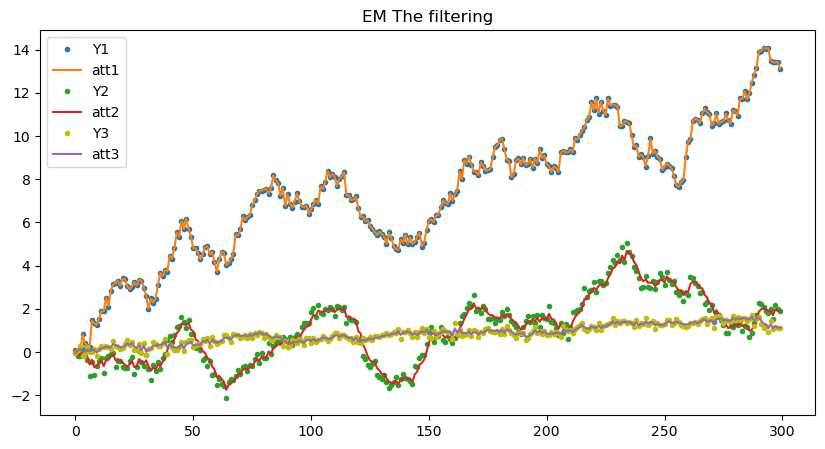

In [10]:
plt.figure(figsize=(10,5))
plt.plot(Y[:,0], '.');
plt.plot(x_smooth_hat[:,0]);
plt.plot(Y[:,1], '.');
plt.plot(x_smooth_hat[:,1]);
plt.plot(Y[:,2], '.', color='y');
plt.plot(x_smooth_hat[:,2]);
plt.legend(['Y1','att1', 'Y2','att2', 'Y3','att3']);
plt.title('The smoothing em');
plt.show();

plt.figure(figsize=(10,5))
plt.plot(Y[:,0], '.');
plt.plot(att_hat[:,0]);
plt.plot(Y[:,1], '.');
plt.plot(att_hat[:,1]);
plt.plot(Y[:,2], '.', color='y');
plt.plot(att_hat[:,2]);
plt.legend(['Y1','att1', 'Y2','att2', 'Y3','att3']);
plt.title('EM The filtering');
plt.show();

In [11]:
# Checking residuals 

standardized_residuals_em = np.empty(np.shape(vt_hat))

for i in range(0, len(vt_hat)):
    
    v = np.reshape(vt_hat[i,:], (len(vt_hat[i]), 1))
    F = Ft_hat[i, :, :]
    
    standardized_residuals_em[i] = (cholesky(inv(F)).T @ v).T

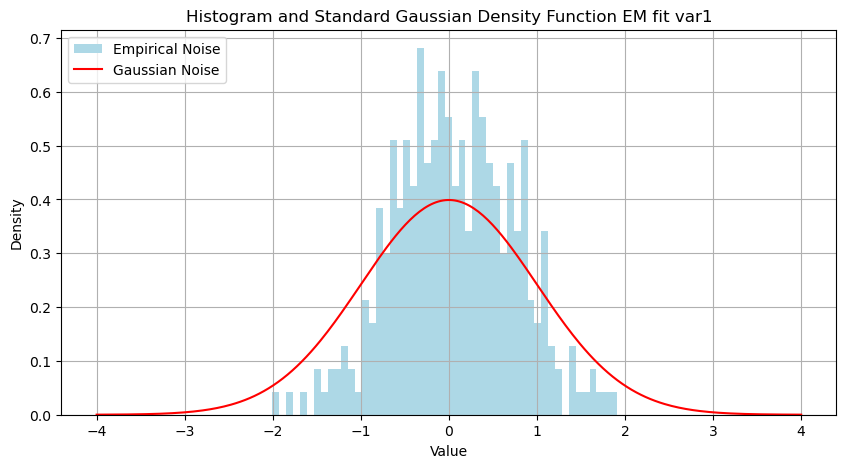

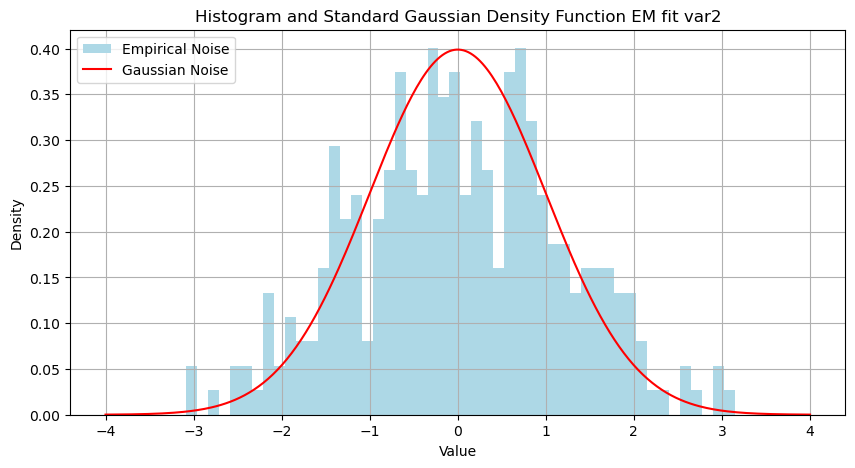

In [12]:
plt.figure(figsize=(10,5))
plt.hist(standardized_residuals_em[:,0], bins=50, density=True, color='lightblue', label='Empirical Noise')
pdf = norm.pdf(np.linspace(-4, 4, n_steps), loc=0, scale=1)
plt.plot(np.linspace(-4, 4, n_steps), pdf, color='r', label='Gaussian Noise')
plt.grid()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram and Standard Gaussian Density Function EM fit var1')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(10,5))
plt.hist(standardized_residuals_em[:,1], bins=50, density=True, color='lightblue', label='Empirical Noise')
pdf = norm.pdf(np.linspace(-4, 4, n_steps), loc=0, scale=1)
plt.plot(np.linspace(-4, 4, n_steps), pdf, color='r', label='Gaussian Noise')
plt.grid()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram and Standard Gaussian Density Function EM fit var2')
plt.legend(loc='upper left')
plt.show()

In [13]:
####################### Testing ML estimates 

params = np.ones(9)
params = np.hstack((params, np.zeros(6)))
params = np.hstack((params, np.zeros(3)))

In [14]:
start = time();

F_mlfit, H_mlfit, Q_mlfit, T_t_mlfit = LeadLagMLfit(params, Y, 3)

Q_t_ml = np.hstack((Q_mlfit, np.zeros(np.shape(Q_mlfit))));
Q_t_ml = np.vstack((Q_t_ml, np.zeros( (3, 6) ) ) );


end = time() 

print('Time: '+str(end-start))

Time: 79.82895922660828


In [15]:
att_ml, Ptt_ml, at_ml, Pt_ml, vt_ml, Ft_ml, Kt_ml, loglike = LeadLagKF(Y, Z_t, T_t_mlfit, H_mlfit, Q_t_ml);

x_smooth_ml, V_smooth_ml, Vt_smooth_ml = LeadLagSmoothing(Y, Z_t, T_t_mlfit, att_ml, Ptt_ml, Pt_ml, vt_ml, Ft_ml, Kt_ml)


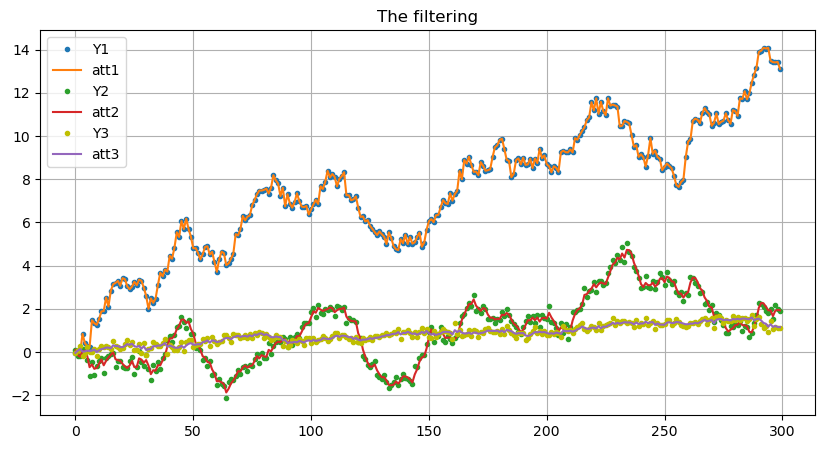

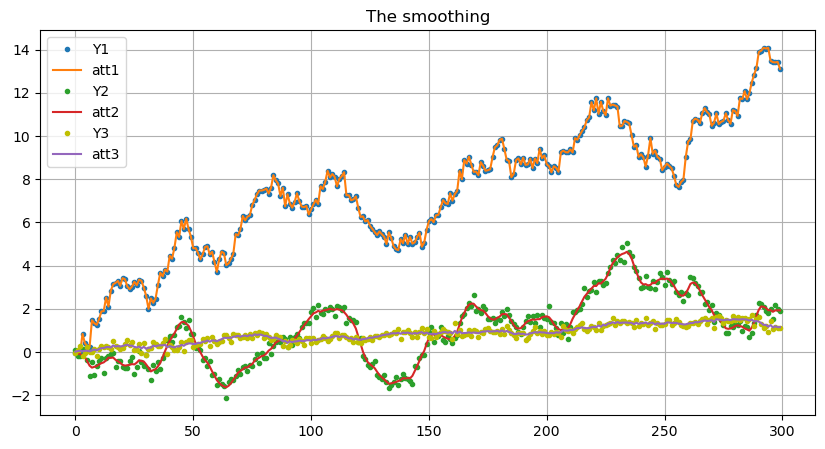

In [16]:
plt.figure(figsize=(10,5))
plt.plot(Y[:,0], '.');
plt.plot(att_ml[:,0]);
plt.plot(Y[:,1], '.');
plt.plot(att_ml[:,1]);
plt.plot(Y[:,2], '.', color='y');
plt.plot(att_ml[:,2]);
plt.legend(['Y1','att1', 'Y2','att2', 'Y3','att3']);
plt.title('The filtering');
plt.grid()
plt.show();

plt.figure(figsize=(10,5))
plt.plot(Y[:,0], '.');
plt.plot(x_smooth_ml[:,0]);
plt.plot(Y[:,1], '.');
plt.plot(x_smooth_ml[:,1]);
plt.plot(Y[:,2], '.', color='y');
plt.plot(x_smooth_ml[:,2]);
plt.legend(['Y1','att1', 'Y2','att2', 'Y3','att3']);
plt.title('The smoothing');
plt.grid()
plt.show();


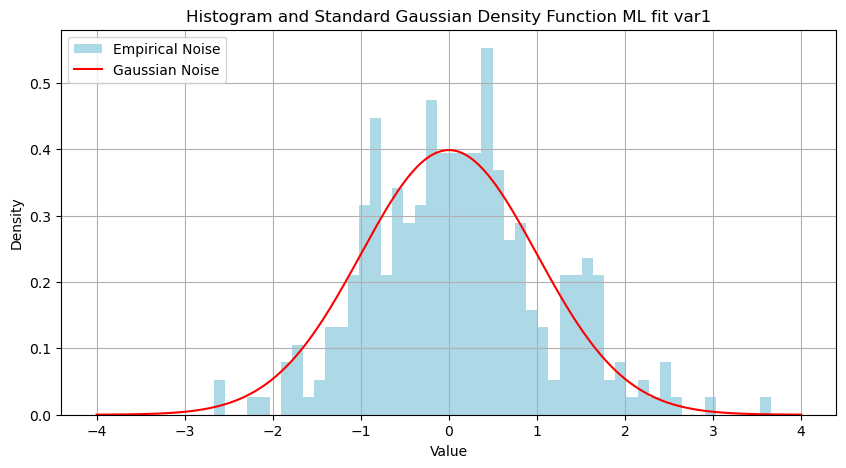

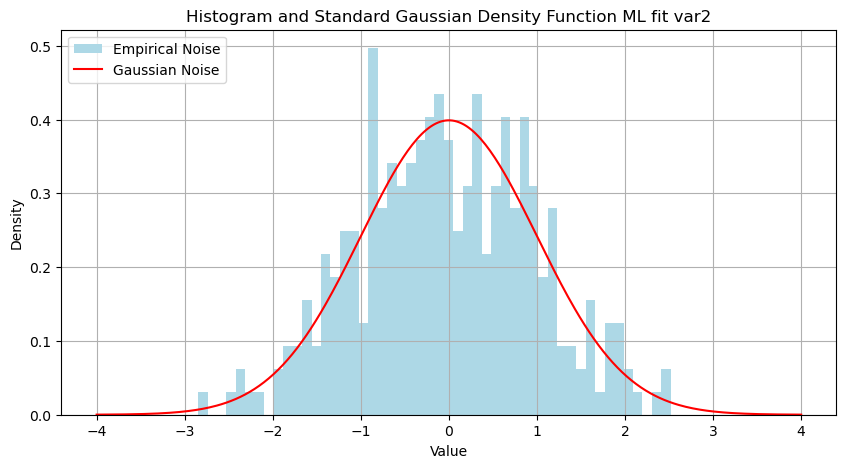

In [17]:
# Checking residuals 

standardized_residuals_ml = np.empty(np.shape(vt_hat))

for i in range(0, len(vt_hat)):
    
    v = np.reshape(vt_ml[i,:], (len(vt_ml[i]), 1))
    F = Ft_ml[i, :, :]
    
    standardized_residuals_ml[i] = (cholesky(inv(F)).T @ v).T
    
plt.figure(figsize=(10,5))
plt.hist(standardized_residuals_ml[:,0], bins=50, density=True, color='lightblue', label='Empirical Noise')
pdf = norm.pdf(np.linspace(-4, 4, n_steps), loc=0, scale=1)
plt.plot(np.linspace(-4, 4, n_steps), pdf, color='r', label='Gaussian Noise')
plt.grid()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram and Standard Gaussian Density Function ML fit var1')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(10,5))
plt.hist(standardized_residuals_ml[:,1], bins=50, density=True, color='lightblue', label='Empirical Noise')
pdf = norm.pdf(np.linspace(-4, 4, n_steps), loc=0, scale=1)
plt.plot(np.linspace(-4, 4, n_steps), pdf, color='r', label='Gaussian Noise')
plt.grid()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram and Standard Gaussian Density Function ML fit var2')
plt.legend(loc='upper left')
plt.show()